# paths

In [10]:
pathCosmicInt = '/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star/Scripts'
#'/home/cneijssel/Documents/COMPASpop/popsynth/Papers/NeijsselEtAL/PostProcessing/2_CosmicIntegration'
pathData      = '/Volumes/TOSHIBA EXT/BHNS_all_in/Fiducial/'
pathConvective= '/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star/Scripts'

# imports

In [11]:
import numpy              as np
import h5py               as h5
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches 
import sys


# Custom imports

In [21]:
sys.path.append(pathCosmicInt)
sys.path.append(pathData)
sys.path.append(pathConvective)
import coencodeVarious as CV
import ClassCosmicIntegrator as CI
import ClassCOMPAS     as CC

# The cosmic integration

In [13]:
print pathData + 'COMPASOutput.h5'

/Volumes/TOSHIBA EXT/BHNS_all_in/Fiducial/COMPASOutput.h5


In [23]:
#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathData, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=True)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


In [44]:
minz = 0.
maxz = 1.
resz = 1
Data = CI.CosmicIntegrator(COMPASpath = pathData ,\
                minRedshift=minz,   maxRedshift=maxz,\
                           nrRedshiftBins=resz) #, optimistic=False, withinHubbleTime=True,\
#                           GWdetector_sensitivity='design')



# Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=True)
# Data.setCOMPASData()

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
()
cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


In [37]:
print 

In [40]:
#set the MSSFR model
Data.MSSFR.Zprescription         = 'logNormal'
Data.MSSFR.SFRprescription       = 'Neijssel et al. (2019)'
Data.MSSFR.logNormalPrescription = 'Neijssel Phenomenological'



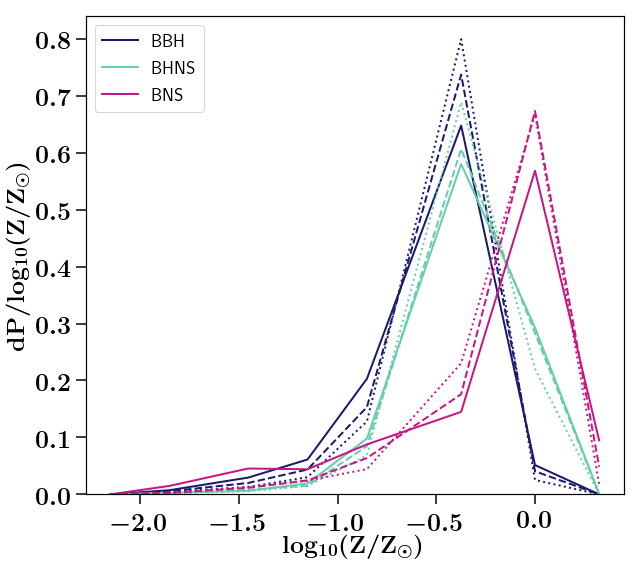

In [41]:
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]
linestyles = ['-', '--', ':']

fig, axes = plt.subplots(1,1,figsize=(9,8))

for nrT, Type in enumerate(Types):
    #Get the mask (using the defaults within Hubbletime and pessimistic systems)
    Data.COMPAS.setCOMPASDCOmask(types=Type,  withinHubbleTime=True)
    #Get the data given the mask
    Data.COMPAS.setCOMPASData()
#     weightSTROOPWAFEL = Data.weights()
    #quick fudge to get exactly the merger redshifts I want.
    #this only works because I do NOT multiply by the volume of the shell (rate per year per Gpc3)
    Data.Shell_centerRedshift = np.array([0,0.5,1.0])

    #calculate birth times per system per redshift (this is independent of the variation)
    Data.setBirthTimesAnd2Darrays()
    #integrate
    Data.cosmologicalIntegration()
    
    #get rates 
    RatePerSystemPerz = Data.PerSystemPerRedshift_ratesIntrinsic#*weightSTROOPWAFEL 
    solar             = Data.MSSFR.solarMetallicity
    metallicities     = Data.COMPAS.metallicitySystems/solar

    #get bins used (based on all initials file)
    metallicityBins = Data.MSSFR.metallicityBinEdges/solar
    dZ              = np.diff(np.log10(metallicityBins/solar))
    #the lowest bin has an offset, instead I use the grid for the xvalues
    xvalues         = np.log10(Data.MSSFR.metallicityGrid/solar)
    for nrz, redshift in enumerate(Data.Shell_centerRedshift):
        metallicityMergers = metallicities
        rateMergers        = RatePerSystemPerz[nrz]
        y, _               = np.histogram(metallicityMergers, bins=metallicityBins,\
                                          weights = rateMergers)
        dydZ               = np.divide(y, dZ)
        dydZ = dydZ / float(np.sum(dydZ))
        #normalize
        if nrz == 0:
            label = Types[nrT]
        else:
            label=None
        axes.plot(xvalues, dydZ, c=Colours[nrT], label=label,\
                  linestyle=linestyles[nrz], lw=2.0)



nameX = r'$\rm log_{10}(Z/Z_{\odot} )$'
nameY = r'$\rm dP/log_{10}(Z/Z_{\odot})$'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.legend(prop={'size':18}, loc=2)
axes.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig('./MetallicityProgenitorLocalMergers.png', dpi=300, transparent=False)
plt.show()
plt.close()
#close H5file 


In [ ]:
#close H5file 

Data.COMPAS.h5file.close()
